In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
d = pd.read_csv('2017.csv')
gdp = np.array(d['Economy..GDP.per.Capita.'])[:20]
happiness = np.array(d['Happiness.Score'])[:20]

In [41]:
gdp.shape

(20,)

In [43]:
a = ((2,1,4),(1,5,9))

In [46]:
a

((2, 1, 4), (1, 5, 9))

In [45]:
v

array([[2, 1, 4],
       [1, 5, 9]])

In [51]:
v.shape

(2, 3)

In [59]:
np.ones((8,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [38]:
def linear_nn(x, w):
    x_with_bias = np.c_[x, np.ones(x.shape[0])]
    return np.matmul(w, x_with_bias.transpose())

In [4]:
def update(w, x_with_bias, y, learning_rate):
    error = np.matmul(w, x_with_bias.transpose()) - y
    error_m = error.mean()
    delta_w = - 2 * learning_rate * np.matmul(x_with_bias.transpose(), error)
    return w + delta_w

In [5]:
def train(x, y, learning_rate, iterNum):    
    x_with_bias = np.c_[x, np.ones(x.shape[0])]
    w = np.random.random(x_with_bias.shape[1])
    w_dynamics = []
    for _ in range(iterNum):
        w = update(w, x_with_bias, y, learning_rate)
        w_dynamics.append(w)
    return w, w_dynamics

In [6]:
learning_rate = 0.01
iterNum = 10
trained_w, w_dynamics = train(gdp, happiness, learning_rate, iterNum)

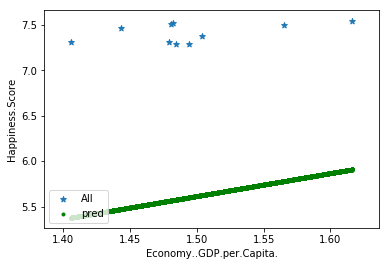

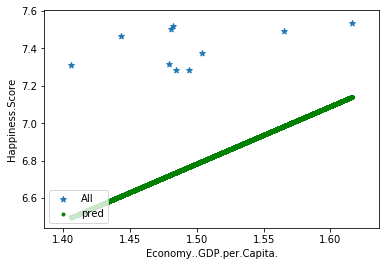

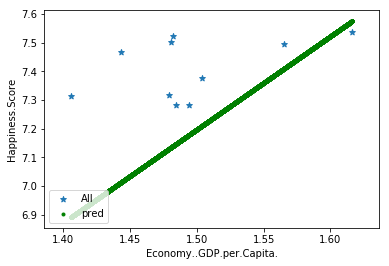

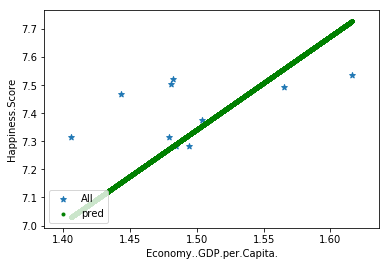

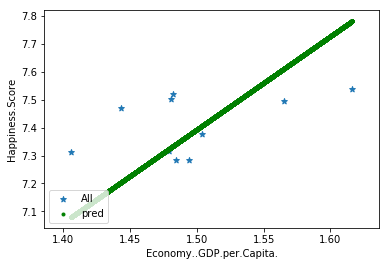

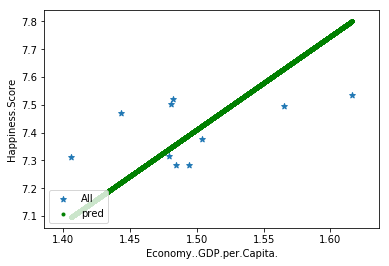

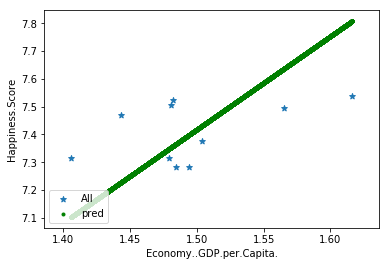

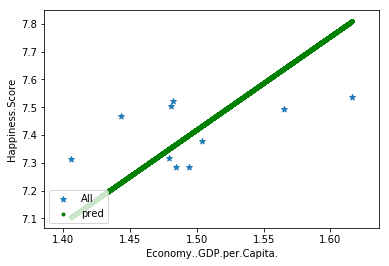

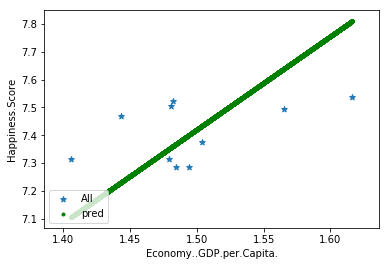

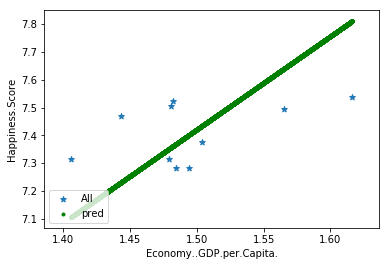

In [7]:
for w in w_dynamics[::]:
    fig, ax = plt.subplots()
    gdp_test = np.linspace(gdp.min(), gdp.max(), 10000)
    happiness_predict = linear_nn(gdp_test, w)
    ax.scatter(gdp, happiness, label='All', marker='*')
    ax.scatter(gdp_test, happiness_predict, c='green', marker='.' , label='pred')
    ax.legend(loc='lower left')
    ax.set_xlabel('Economy..GDP.per.Capita.')
    ax.set_ylabel('Happiness.Score')